In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#############State Space############

In [54]:
state_space = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        state_space[i][j] = i * 10 + j
state_space = np.transpose(state_space)

In [55]:
state_space

array([[ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.],
       [ 1., 11., 21., 31., 41., 51., 61., 71., 81., 91.],
       [ 2., 12., 22., 32., 42., 52., 62., 72., 82., 92.],
       [ 3., 13., 23., 33., 43., 53., 63., 73., 83., 93.],
       [ 4., 14., 24., 34., 44., 54., 64., 74., 84., 94.],
       [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
       [ 6., 16., 26., 36., 46., 56., 66., 76., 86., 96.],
       [ 7., 17., 27., 37., 47., 57., 67., 77., 87., 97.],
       [ 8., 18., 28., 38., 48., 58., 68., 78., 88., 98.],
       [ 9., 19., 29., 39., 49., 59., 69., 79., 89., 99.]])

In [56]:
actions = ('R', 'L', 'U', 'D')

In [57]:
############### Transition probabilities ###################

In [58]:
w = 0.1

In [59]:
############## One dir at a time #########

In [60]:
transR = np.zeros((100, 100))

In [61]:
for i in range(10):
    for j in range(10):
        ind = i * 10 + j
        # Intended left action
        if(ind - 10 < 0):
            transR[ind][ind] += w / 4
        else:
            transR[ind][ind - 10] = w / 4
        # Intended right action
        if(ind + 10 >= 100):
            transR[ind][ind] += w / 4
        else:
            transR[ind][ind + 10] = 1 - w + w / 4
        # Intended up action
        if(ind in state_space[0]):
            transR[ind][ind] += w / 4
        else:
            transR[ind][ind - 1] = w / 4
        # Intended down action
        if(ind in state_space[9]):
            transR[ind][ind] += w / 4
        else:
            transR[ind][ind + 1] = w / 4
        # Blowing off on the right side
        if(ind + 10 > 99):
            transR[ind][ind] += 1 - w

In [62]:
transL = np.zeros((100, 100))

In [63]:
for i in range(10):
    for j in range(10):
        ind = i * 10 + j
        # Intended left action
        if(ind - 10 < 0):
            transL[ind][ind] += w / 4
        else:
            transL[ind][ind - 10] = 1 - w + w / 4
        # Intended right action
        if(ind + 10 >= 100):
            transL[ind][ind] += w / 4
        else:
            transL[ind][ind + 10] = w / 4
        # Intended up action
        if(ind in state_space[0]):
            transL[ind][ind] += w / 4
        else:
            transL[ind][ind - 1] = w / 4
        # Intended down action
        if(ind in state_space[9]):
            transL[ind][ind] += w / 4
        else:
            transL[ind][ind + 1] = w / 4
        # Blowing off on the left side
        if(ind - 10 < 0):
            transL[ind][ind] += 1 - w

In [64]:
transU = np.zeros((100, 100))

In [65]:
for i in range(10):
    for j in range(10):
        ind = i * 10 + j
        # Intended left action
        if(ind - 10 < 0):
            transU[ind][ind] += w / 4
        else:
            transU[ind][ind - 10] = w / 4
        # Intended right action
        if(ind + 10 >= 100):
            transU[ind][ind] += w / 4
        else:
            transU[ind][ind + 10] = w / 4
        # Intended up action
        if(ind in state_space[0]):
            transU[ind][ind] += w / 4
        else:
            transU[ind][ind - 1] = 1 - w + w / 4
        # Intended down action
        if(ind in state_space[9]):
            transU[ind][ind] += w / 4
        else:
            transU[ind][ind + 1] = w / 4
        # Blowing off on the top side
        if(ind in state_space[0]):
            transU[ind][ind] += 1 - w

In [66]:
transD = np.zeros((100, 100))

In [67]:
for i in range(10):
    for j in range(10):
        ind = i * 10 + j
        # Intended left action
        if(ind - 10 < 0):
            transD[ind][ind] += w / 4
        else:
            transD[ind][ind - 10] = w / 4
        # Intended right action
        if(ind + 10 >= 100):
            transD[ind][ind] += w / 4
        else:
            transD[ind][ind + 10] = w / 4
        # Intended up action
        if(ind in state_space[0]):
            transD[ind][ind] += w / 4
        else:
            transD[ind][ind - 1] = w / 4
        # Intended down action
        if(ind in state_space[9]):
            transD[ind][ind] += w / 4
        else:
            transD[ind][ind + 1] = 1 - w + w / 4
        # Blowing off on the bottom side
        if(ind in state_space[9]):
            transD[ind][ind] += 1 - w

In [68]:
#############################

In [69]:
############ Reward function #################

In [70]:
reward1 = np.zeros((10, 10))
reward1[9, 9] = 1.0

In [71]:
reward1[9, 9]

1.0

In [72]:
reward2 = np.zeros((10, 10))

In [121]:
rf2=np.matrix([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  -100,  -100,  -100,  0,  0,  0],
 [ 0,  0,  0,  0,  -100,  0,  -100,  0,  0,  0],
 [ 0,  0,  0,  0,  -100,  0,  -100,  -100,  -100,  0],
 [ 0,  0,  0,  0,  -100,  0,  0,  0,  -100,  0],
 [ 0,  0,  0,  0,  -100,  0,  0,  0,  -100,  0],
 [ 0,  0,  0,  0,  -100,  0,  0,  0,  -100,  0],
 [ 0,  0,  0,  0,  0,  0,  -100,  -100,  -100,  0],
 [ 0,  0,  0,  0,  0,  0,  -100,  0,  0,  0],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  10]])

In [73]:
reward2[1:7, 4] = -100.0
reward2[1, 5] = -100.0
reward2[1:4, 6] = -100.0
reward2[7:9, 6] = -100.0
reward2[3, 7] = -100.0
reward2[7, 7] = -100.0
reward2[3:8, 8] = -100.0
reward2[9, 9] = 10.0

In [122]:
reward2 == rf2

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True]])

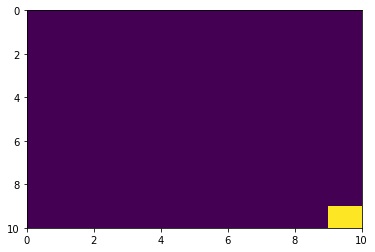

In [75]:
plt.pcolor(reward1, )
plt.gca().invert_yaxis()
plt.show()

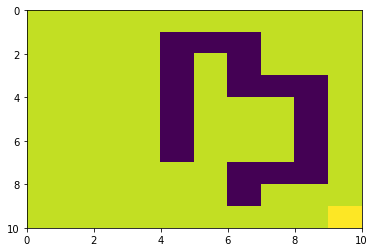

In [76]:
plt.pcolor(reward2)
plt.gca().invert_yaxis()
plt.show()

In [77]:
########################

In [78]:
gamma = 0.8

In [79]:
def optimal_state_value(transL, transR, transU, transD, reward, gamma):
    v = np.zeros(100)
    delta = np.inf
    epsilon = 0.01
    while(delta > epsilon):
        delta = 0
        v_dash = np.copy(v)
        for s in range(100):
            temp_v = v_dash[s]
            l = np.sum(transL[s] * (reward.flatten() + gamma * v_dash))
            r = np.sum(transR[s] * (reward.flatten() + gamma * v_dash))
            u = np.sum(transU[s] * (reward.flatten() + gamma * v_dash))
            d = np.sum(transD[s] * (reward.flatten() + gamma * v_dash))
            
            #print(l)
            v[s] = max(l, r, u, d)
            delta = max(delta, abs(temp_v - v[s]))
    return v

In [80]:
v = optimal_state_value(transL, transR, transU, transD, reward1, gamma)

In [81]:
v

array([0.0442397 , 0.06457398, 0.09118409, 0.12504106, 0.16807826,
       0.22269335, 0.29198796, 0.37988042, 0.49134892, 0.61001145,
       0.06457398, 0.08833385, 0.12185345, 0.16476116, 0.21945345,
       0.28917752, 0.37804302, 0.49122817, 0.63338372, 0.78751905,
       0.09118409, 0.12185345, 0.16458987, 0.21930412, 0.28906986,
       0.3779887 , 0.49131731, 0.63565109, 0.81751608, 1.01875794,
       0.12504106, 0.16476116, 0.21930412, 0.28906536, 0.37798653,
       0.49132035, 0.63576137, 0.81977022, 1.05235181, 1.31521922,
       0.16807826, 0.21945345, 0.28906986, 0.37798653, 0.49132036,
       0.63576402, 0.81985582, 1.05442573, 1.35173221, 1.69523349,
       0.22269335, 0.28917752, 0.3779887 , 0.49132035, 0.63576402,
       0.81985701, 1.05448231, 1.35348475, 1.73334073, 2.18239181,
       0.29198796, 0.37804302, 0.49131731, 0.63576137, 0.81985582,
       1.05448231, 1.3535115 , 1.73462151, 2.21968743, 2.80696303,
       0.37988042, 0.49122817, 0.63565109, 0.81977022, 1.05442

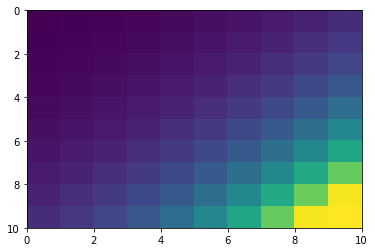

In [82]:
plt.pcolor(v.reshape((10, 10)))
plt.gca().invert_yaxis()
plt.show()

In [129]:
def optimal_policy(transL, transR, transU, transD, reward, gamma):
    v = optimal_state_value(transL, transR, transU, transD, reward, gamma)
    print(v)
    action = np.zeros(100)
    rew = np.transpose(reward).flatten()
    for s in range(100):
        l = np.sum(transL[s] * (rew + gamma * v))
        r = np.sum(transR[s] * (rew + gamma * v))
        u = np.sum(transU[s] * (rew + gamma * v))
        d = np.sum(transD[s] * (rew + gamma * v))
            
        #print(l)
        action[s] = np.argmax([l, r, u, d])

    return action

In [100]:
np.asarray(np.transpose(reward2)).reshape(-1) == np.transpose(reward2).flatten()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [123]:
actions == [3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 3.,
 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
 1., 1., 1., 1., 3., 3., 3., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 3.,
 3., 3., 3., 3., 3., 3., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 3., 3., 3., 3., 3., 3.,
 3., 3., 3., 1.]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [102]:
np.argmax([4, 2, 3, 5])

3

In [103]:
[4, 2, 3, 5].index(np.amax([4, 2, 3, 5]))

3

In [114]:
def get_arrows(actions):
    arrows = ["" for x in range(100)]
    for i in range(100):
        if(actions[i]==0):
            arrows[i]=u'\u2190'
        elif(actions[i]==1):
            arrows[i]=u'\u2192'
        elif(actions[i]==2):
            arrows[i]=u'\u2191'
        elif(actions[i]==3):
            arrows[i]=u'\u2193'
    return arrows

In [120]:
print(u'\u2192')

→


In [130]:
actions = optimal_policy(transL, transR, transU, transD, reward1, gamma)
arrows = get_arrows(actions)
print(np.transpose(np.asarray(arrows).reshape((10, 10))))

[0.0442397  0.06457398 0.09118409 0.12504106 0.16807826 0.22269335
 0.29198796 0.37988042 0.49134892 0.61001145 0.06457398 0.08833385
 0.12185345 0.16476116 0.21945345 0.28917752 0.37804302 0.49122817
 0.63338372 0.78751905 0.09118409 0.12185345 0.16458987 0.21930412
 0.28906986 0.3779887  0.49131731 0.63565109 0.81751608 1.01875794
 0.12504106 0.16476116 0.21930412 0.28906536 0.37798653 0.49132035
 0.63576137 0.81977022 1.05235181 1.31521922 0.16807826 0.21945345
 0.28906986 0.37798653 0.49132036 0.63576402 0.81985582 1.05442573
 1.35173221 1.69523349 0.22269335 0.28917752 0.3779887  0.49132035
 0.63576402 0.81985701 1.05448231 1.35348475 1.73334073 2.18239181
 0.29198796 0.37804302 0.49131731 0.63576137 0.81985582 1.05448231
 1.3535115  1.73462151 2.21968743 2.80696303 0.37988042 0.49122817
 0.63565109 0.81977022 1.05442573 1.35348475 1.73462151 2.22036214
 2.83941767 3.60778693 0.49134892 0.63338372 0.81751608 1.05235181
 1.35173221 1.73334073 2.21968743 2.83941767 3.62897444 4.6347

In [220]:
np.asarray(arr).reshape((10, 10))

array([['→', '↓', '↓', '↓', '↓', '↓', '↓', '↓', '→', '→'],
       ['→', '→', '↓', '↓', '↓', '↓', '→', '→', '→', '→'],
       ['→', '→', '→', '↓', '↓', '→', '→', '→', '→', '→'],
       ['→', '→', '→', '→', '→', '→', '→', '→', '→', '→'],
       ['→', '→', '→', '↓', '→', '→', '→', '→', '→', '→'],
       ['→', '→', '↓', '↓', '↓', '→', '→', '→', '→', '→'],
       ['→', '↓', '↓', '↓', '↓', '↓', '→', '→', '→', '→'],
       ['→', '↓', '↓', '↓', '↓', '↓', '↓', '→', '→', '→'],
       ['↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓', '→', '→'],
       ['↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓', '↓', '→']], dtype='<U1')

In [197]:
############ Question 6 #######

In [125]:
v2 = optimal_state_value(transL, transR, transU, transD, reward2, gamma)

In [126]:
print(v2)

[ 6.46710402e-01  7.90798480e-01  8.20813046e-01  5.25100092e-01
 -2.38647637e+00 -4.23692968e+00 -1.92337440e+00  1.12809691e+00
  1.59116227e+00  2.03482701e+00  8.27724228e-01  1.01773259e+00
  1.06157960e+00 -1.87921677e+00 -6.75466905e+00 -8.68371372e+00
 -6.37348342e+00 -1.29836115e+00  1.92477470e+00  2.60689337e+00
  1.06131226e+00  1.31300108e+00  1.44578824e+00 -1.63521080e+00
 -6.75775652e+00 -1.39166346e+01 -9.65320172e+00 -5.51481504e+00
 -1.34600438e-01  3.35547821e+00  1.35778625e+00  1.68918212e+00
  1.94390703e+00 -1.24321750e+00 -6.33921636e+00 -7.98277134e+00
 -7.94729165e+00 -9.43445243e+00 -1.91815510e+00  4.38704487e+00
  1.73393379e+00  2.16807921e+00  2.58589509e+00 -7.36489716e-01
 -5.84672738e+00 -3.25840283e+00 -3.24107127e+00 -7.43449847e+00
  1.71515827e+00  9.15952421e+00  2.21111919e+00  2.77755323e+00
  3.41334536e+00 -3.81397000e-02 -5.11411173e+00 -5.53379765e-01
 -4.87536492e-01 -2.98351453e+00  6.58269181e+00  1.53537569e+01
  2.81642901e+00  3.55296

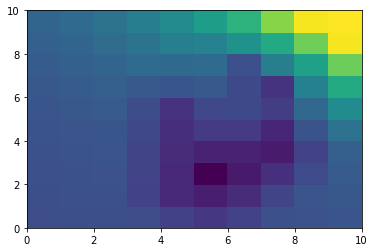

In [127]:
plt.pcolor(v2.reshape((10, 10)))
plt.show()

In [128]:
actions2 = optimal_policy(transL, transR, transU, transD, reward2, gamma)
arrows2 = get_arrows(actions2)
print(np.transpose(np.asarray(arrows2).reshape((10, 10))))

[['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↑' '↓' '→' '→' '↓' '↓']
 ['→' '→' '→' '↑' '→' '↓' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '→' '↑' '↓' '↓' '→' '↓']
 ['↑' '↑' '↑' '↑' '→' '→' '→' '↓' '→' '↓']
 ['↓' '←' '↑' '↑' '→' '→' '→' '↑' '→' '↓']
 ['↓' '↓' '↓' '↑' '→' '→' '↑' '↑' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '↑' '↓' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '↓' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→']]
